In [1]:
# Imports & Styling

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

plt.rcParams['figure.figsize'] = (14.0, 8.0)
# Control the default size of figures in this jupyter notebook

In [2]:
# Cryptos for analysis

cryptos = {
    "Bitcoin": "BTCUSD",
    "Ethereum": "ETHUSD",
    "Binance": "BNBUSD",
    "Ripple": "XRPUSD",
    "Cardano": "ADAUSD",
    "Solana": "SOLUSD",
    "Dogecoin": "DOGEUSD",
    "Polkadot": "DOTUSD",
    "Polygon": "MATICUSD",
    "Avlanche": "AVAXUSD",
    "Litecoin": "LTCUSD",
    "Cosmos": "ATOMUSD",
    "ETH Classic": "ETCUSD",
    "Monero": "XMRUSD",
    "Algorand": "ALGOUSD",
    "NEAR Protocol": "NEARUSD",
    "Flow": "FLOWUSD",
    "Tron": "TRXUSD",
    "Zcash": "ZECUSD",
    "Decentraland": "MANAUSD",
    "The Sandbox": "SANDUSD",
    "Ape Coin ?": "APEUSD",
    "Filecoin": "FILUSD",
    "Stellar": "XLMUSD",
    "USDC": "USDCUSD",
    "USDT": "USDTUSD",
}

cryptos

{'Bitcoin': 'BTCUSD',
 'Ethereum': 'ETHUSD',
 'Binance': 'BNBUSD',
 'Ripple': 'XRPUSD',
 'Cardano': 'ADAUSD',
 'Solana': 'SOLUSD',
 'Dogecoin': 'DOGEUSD',
 'Polkadot': 'DOTUSD',
 'Polygon': 'MATICUSD',
 'Avlanche': 'AVAXUSD',
 'Litecoin': 'LTCUSD',
 'Cosmos': 'ATOMUSD',
 'ETH Classic': 'ETCUSD',
 'Monero': 'XMRUSD',
 'Algorand': 'ALGOUSD',
 'NEAR Protocol': 'NEARUSD',
 'Flow': 'FLOWUSD',
 'Tron': 'TRXUSD',
 'Zcash': 'ZECUSD',
 'Decentraland': 'MANAUSD',
 'The Sandbox': 'SANDUSD',
 'Ape Coin ?': 'APEUSD',
 'Filecoin': 'FILUSD',
 'Stellar': 'XLMUSD',
 'USDC': 'USDCUSD',
 'USDT': 'USDTUSD'}

In [3]:
# Generate API CSV links

apikey = ""
# apikey = "a5a529261ae84f20655f8188ee12cc6e"
link = "https://fmpcloud.io/api/v3/historical-price-full/{PAIRING}?datatype=csv&apikey=" + apikey

for name, pairing in cryptos.items():
    print(link.replace("{PAIRING}", pairing))

https://fmpcloud.io/api/v3/historical-price-full/BTCUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/ETHUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/BNBUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/XRPUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/ADAUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/SOLUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/DOGEUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/DOTUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/MATICUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/AVAXUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/LTCUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/ATOMUSD?datatype=csv&apikey=
https://fmpcloud.io/api/v3/historical-price-full/ETCUSD?datatype=csv&ap

In [4]:
# Example w/ BTC Data

btc = pd.read_csv("./data/btc-usd_historical_chart.csv")
btc

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2022-10-09,19418.700210,19559.515061,19318.188535,19416.600338,19416.600338,2.294159e+09,2.294159e+09,-2.09987,-0.011,19431.43464,"October 09, 22",-0.00011
1,2022-10-08,19532.000786,19627.493834,19241.308154,19418.851102,19418.851102,2.117073e+09,2.117073e+09,-113.14968,-0.579,19429.21770,"October 08, 22",-0.00579
2,2022-10-07,19963.736855,20069.585984,19321.220159,19532.213283,19532.213283,5.140061e+09,5.140061e+09,-431.52357,-2.162,19641.00648,"October 07, 22",-0.02162
3,2022-10-06,20163.907324,20461.665575,19855.292188,19964.048179,19964.048179,7.452392e+09,7.452392e+09,-199.85915,-0.991,20093.66865,"October 06, 22",-0.00991
4,2022-10-05,20344.047149,20371.430833,19735.887047,20163.894906,20163.894906,7.163841e+09,7.163841e+09,-180.15224,-0.886,20090.40426,"October 05, 22",-0.00886
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2017-10-14,5643.529785,5837.700195,5591.640137,5831.790039,5831.790039,1.669030e+09,1.669030e+09,188.26025,3.336,5753.71012,"October 14, 17",0.03336
1822,2017-10-13,5464.160156,5840.299805,5436.850098,5647.209961,5647.209961,3.615480e+09,3.615480e+09,183.04980,3.350,5641.45329,"October 13, 17",0.03350
1823,2017-10-12,4829.580078,5446.910156,4822.000000,5446.910156,5446.910156,2.791610e+09,2.791610e+09,617.33008,12.782,5238.60677,"October 12, 17",0.12782
1824,2017-10-11,4789.250000,4873.729981,4751.629883,4826.479981,4826.479981,1.222280e+09,1.222280e+09,37.22998,0.777,4817.27995,"October 11, 17",0.00777


In [5]:
# Hardcoded function to get the CSV filenames in the 'data' directory.
def getDataWindows():
    x = !dir data
    
    # Drop unecessary lines
    x = x[7:]
    x = x[:-2]
    
    # Split into each element to get filename separate
    # This splits on a space " " character, and grabs the last index of the generated list, which is the filename
    # It also appends "data/" to the front of each element.
    y = ["data/" + i.split(" ")[-1] for i in x]
    
    return y

In [6]:
data = getDataWindows()

print("Length:", len(data))
data

Length: 26


['data/ada-usd_historical_chart.csv',
 'data/algo-usd_historical_chart.csv',
 'data/ape-usd_historical_chart.csv',
 'data/atom-usd_historical_chart.csv',
 'data/avax-usd_historical_chart.csv',
 'data/bnb-usd_historical_chart.csv',
 'data/btc-usd_historical_chart.csv',
 'data/doge-usd_historical_chart.csv',
 'data/dot-usd_historical_chart.csv',
 'data/etc-usd_historical_chart.csv',
 'data/eth-usd_historical_chart.csv',
 'data/fil-usd_historical_chart.csv',
 'data/flow-usd_historical_chart.csv',
 'data/ltc-usd_historical_chart.csv',
 'data/mana-usd_historical_chart.csv',
 'data/matic-usd_historical_chart.csv',
 'data/near-usd_historical_chart.csv',
 'data/sand-usd_historical_chart.csv',
 'data/sol-usd_historical_chart.csv',
 'data/trx-usd_historical_chart.csv',
 'data/usdc-usd_historical_chart.csv',
 'data/usdt-usd_historical_chart.csv',
 'data/xlm-usd_historical_chart.csv',
 'data/xmr-usd_historical_chart.csv',
 'data/xrp-usd_historical_chart.csv',
 'data/zec-usd_historical_chart.csv']

In [7]:
# Printing data (can delete later)

# for path in data:
#     print(path)
#     print(pd.read_csv(path))
#     print()

In [8]:
len(getDataWindows())

26

In [9]:
# Get the adjusted close per day for each coin and add to 1 dataframe
crypto_df = pd.DataFrame()

for path in data:
    
    name = path.split("/")[1].split("_", maxsplit=1)[0]
    # print(name)
    
    df = pd.read_csv(path)
    df = df.set_index('date')
    
    # print(df['adjClose'])
    crypto_df[name] = df['adjClose']
    # print(crypto_df)

    
# Convert index into Datetimes and order from old -> new dates
crypto_df.index = pd.to_datetime(crypto_df.index)
crypto_df.sort_index(inplace=True)

crypto_df

,ada-usd,algo-usd,ape-usd,atom-usd,avax-usd,bnb-usd,btc-usd,doge-usd,dot-usd,etc-usd,...,near-usd,sand-usd,sol-usd,trx-usd,usdc-usd,usdt-usd,xlm-usd,xmr-usd,xrp-usd,zec-usd
date,,,,,,,,,,,,,,,,,,,,,
2017-10-10,0.021531,NaN,NaN,NaN,NaN,1.393360,4781.990234,0.001036,NaN,11.537600,...,NaN,NaN,NaN,0.002225,NaN,0.999441,0.018953,86.821198,0.260733,235.654999
2017-10-11,0.022520,NaN,NaN,NaN,NaN,1.433730,4826.479981,0.001046,NaN,11.494700,...,NaN,NaN,NaN,0.002470,NaN,0.998625,0.019450,87.421700,0.264439,236.132004
2017-10-12,0.026252,NaN,NaN,NaN,NaN,1.343760,5446.910156,0.001062,NaN,11.961900,...,NaN,NaN,NaN,0.002345,NaN,0.997423,0.017784,87.092400,0.248414,227.003998
2017-10-13,0.033641,NaN,NaN,NaN,NaN,1.435480,5647.209961,0.001066,NaN,12.183800,...,NaN,NaN,NaN,0.002113,NaN,1.000050,0.017960,95.134598,0.260489,240.048996
2017-10-14,0.032465,NaN,NaN,NaN,NaN,1.538190,5831.790039,0.001110,NaN,12.256800,...,NaN,NaN,NaN,0.002394,NaN,0.999709,0.017522,100.230003,0.257320,240.888000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-05,0.431018,0.353904,5.203787,13.008994,17.382954,294.273885,20163.894906,0.064795,6.440762,27.635133,...,3.697043,0.861061,34.049061,0.062468,1.000007,1.000191,0.118916,146.209979,0.489111,56.695650
2022-10-06,0.428784,0.349199,5.164008,13.017860,17.048243,287.048431,19964.048179,0.063454,6.341355,27.840276,...,3.623326,0.841384,33.367647,0.062776,0.999904,1.000112,0.119547,149.125436,0.493481,55.188003
2022-10-07,0.424025,0.341621,5.181900,13.057634,16.900602,282.315051,19532.213283,0.062365,6.330608,27.502417,...,3.552326,0.835861,32.980728,0.062516,0.999997,1.000157,0.122255,146.635764,0.518027,54.707598


In [10]:
# Drop NA rows

crypto_df_dropna = crypto_df.dropna(axis='index')
crypto_df_dropna

,ada-usd,algo-usd,ape-usd,atom-usd,avax-usd,bnb-usd,btc-usd,doge-usd,dot-usd,etc-usd,...,near-usd,sand-usd,sol-usd,trx-usd,usdc-usd,usdt-usd,xlm-usd,xmr-usd,xrp-usd,zec-usd
date,,,,,,,,,,,,,,,,,,,,,
2021-01-27,0.313080,0.543153,0.094111,6.988882,11.184797,40.994877,30432.546875,0.007482,15.504861,6.905074,...,2.039675,0.081609,3.690587,0.028325,1.000018,1.001764,0.239070,126.015762,0.251943,79.517738
2021-01-28,0.346129,0.561167,0.092500,8.129528,12.000270,42.529106,33466.097656,0.034084,16.944933,7.686164,...,2.259055,0.088500,3.822072,0.029648,0.999578,1.001543,0.292241,136.006775,0.264122,86.779167
2021-01-29,0.348131,0.640950,0.108754,7.982900,11.621697,42.852348,34316.386719,0.047162,16.841612,7.628500,...,2.202069,0.087839,3.834676,0.033296,0.999971,1.000486,0.294674,140.465393,0.282188,85.867477
2021-01-30,0.362619,0.663792,0.111934,8.049342,11.984419,44.772278,34269.523438,0.028176,16.506908,7.563831,...,2.172294,0.087374,4.224276,0.032028,1.000026,1.001243,0.324866,139.474197,0.440244,84.140106
2021-01-31,0.344898,0.651248,0.125473,8.137376,13.516318,44.275993,33114.359375,0.037196,16.121315,7.412038,...,2.144547,0.082657,4.264144,0.031603,0.999961,1.000808,0.305702,138.060699,0.492314,85.737839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-05,0.431018,0.353904,5.203787,13.008994,17.382954,294.273885,20163.894906,0.064795,6.440762,27.635133,...,3.697043,0.861061,34.049061,0.062468,1.000007,1.000191,0.118916,146.209979,0.489111,56.695650
2022-10-06,0.428784,0.349199,5.164008,13.017860,17.048243,287.048431,19964.048179,0.063454,6.341355,27.840276,...,3.623326,0.841384,33.367647,0.062776,0.999904,1.000112,0.119547,149.125436,0.493481,55.188003
2022-10-07,0.424025,0.341621,5.181900,13.057634,16.900602,282.315051,19532.213283,0.062365,6.330608,27.502417,...,3.552326,0.835861,32.980728,0.062516,0.999997,1.000157,0.122255,146.635764,0.518027,54.707598


Text(0.5, 1.0, '5 Year Crypto Correlation Comparison (no drop na)')

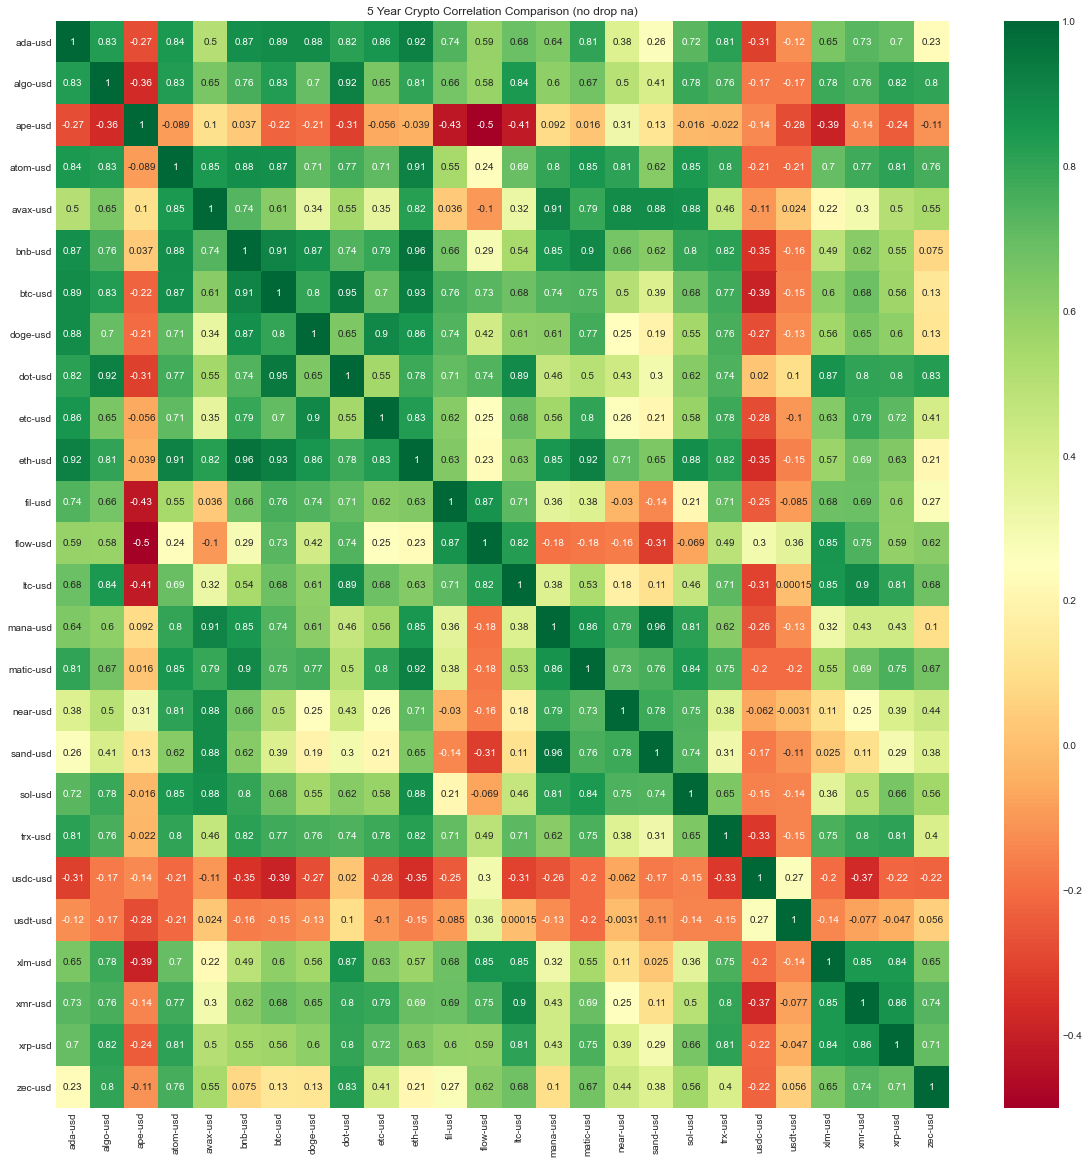

In [11]:
# Plot correlations

plt.figure(figsize=(20, 20))
sns.heatmap(crypto_df.corr(), annot=True, cmap="RdYlGn")
plt.title("5 Year Crypto Correlation Comparison (no drop na)")

Text(0.5, 1.0, '607 Day Crypto Correlation Comparison (dropped Na rows)')

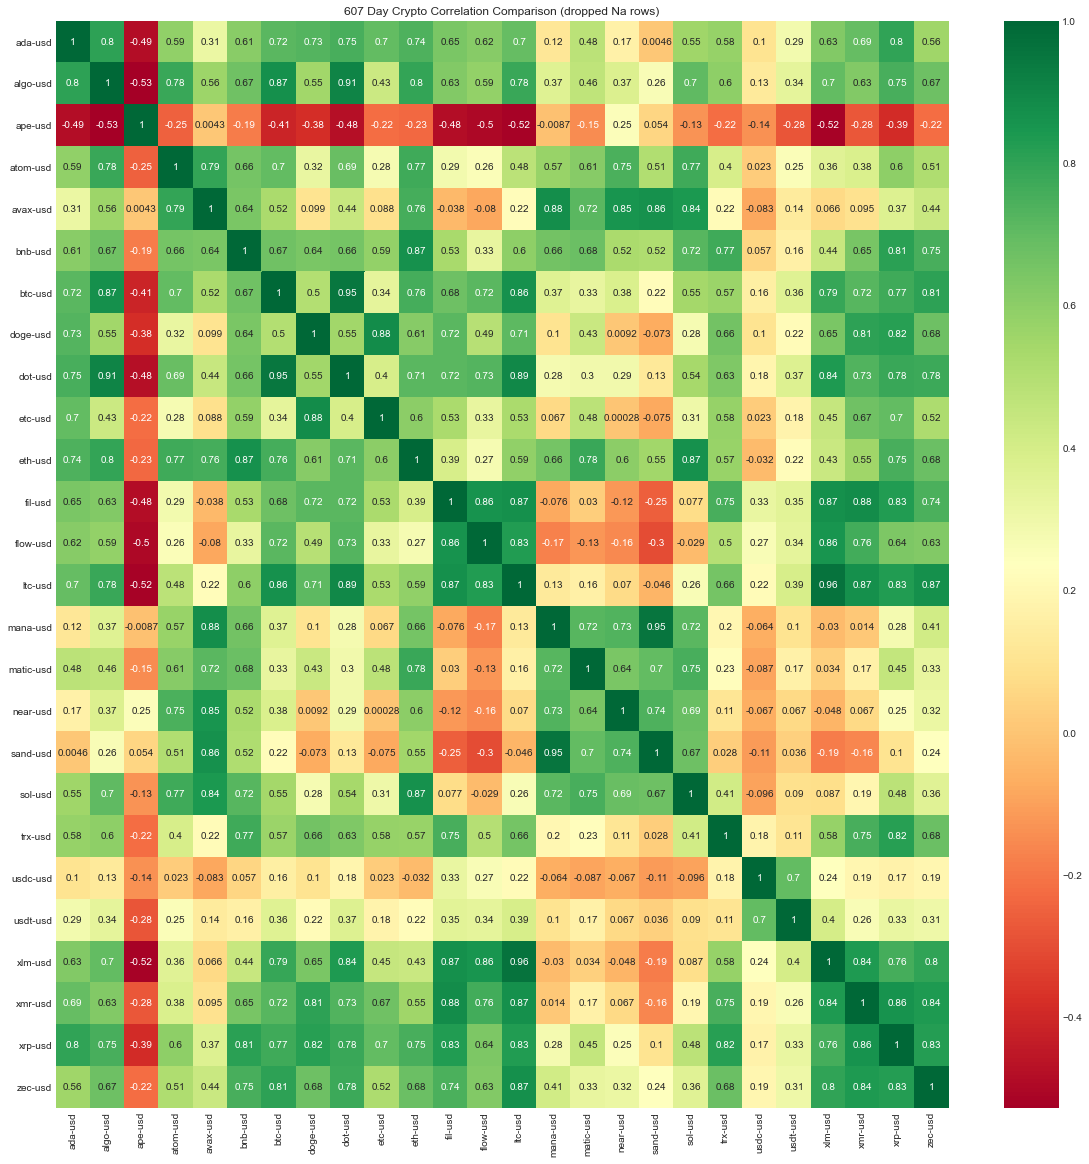

In [12]:
plt.figure(figsize=(20, 20))
sns.heatmap(crypto_df_dropna.corr(), annot=True, cmap="RdYlGn")
plt.title("607 Day Crypto Correlation Comparison (dropped Na rows)")

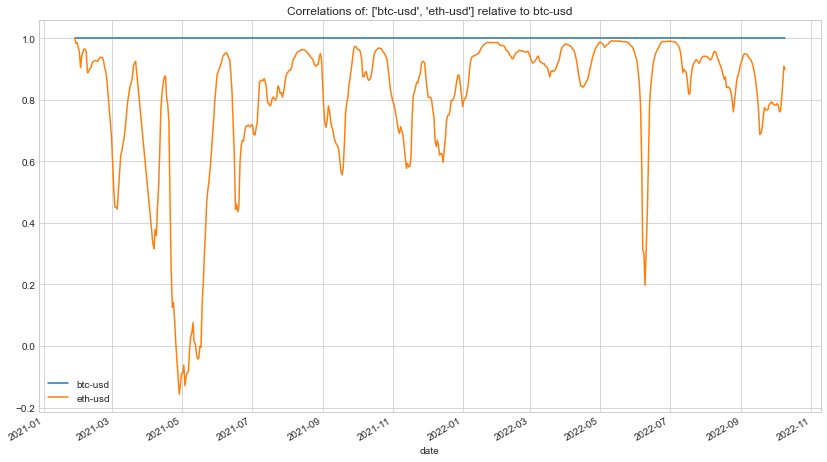

In [13]:
# Correlation Moving Average Function
# Confirm the input DF index is a Datetime index

def corrMA(df, window="30D", test="btc-usd", corrs=["eth-usd"]):
    temp = df.rolling(window).corr()
    
    # Insert the independent variable ticker to the corrs list
    if not test in corrs:
        corrs.insert(0, test)
        
    df_corr = temp[test].unstack()[corrs]
    
    title = "Correlations of: " + str(corrs) + " relative to " + test
    df_corr.plot(title=title)
        
    # return df_corr

corrMA(crypto_df_dropna)

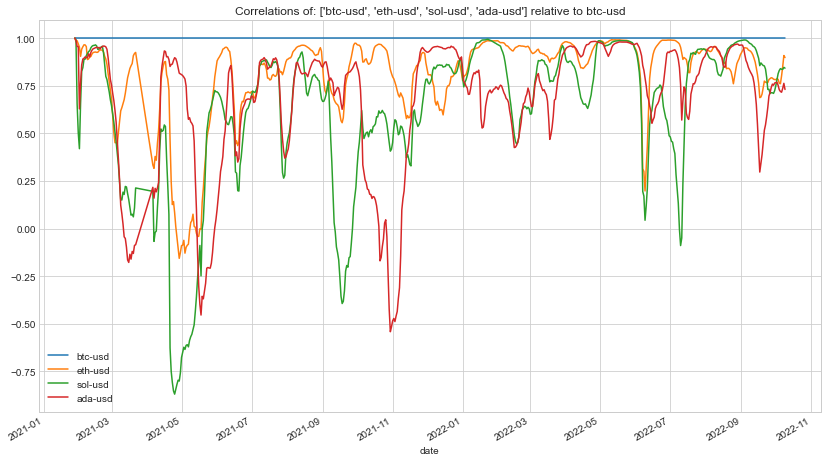

In [14]:
corrMA(crypto_df_dropna, corrs=["eth-usd", "sol-usd", "ada-usd"])

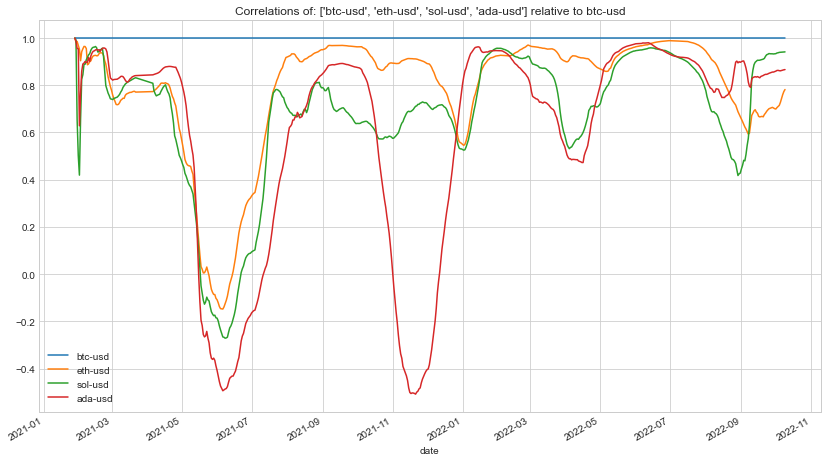

In [15]:
corrMA(crypto_df_dropna, window="90D", corrs=["eth-usd", "sol-usd", "ada-usd"])

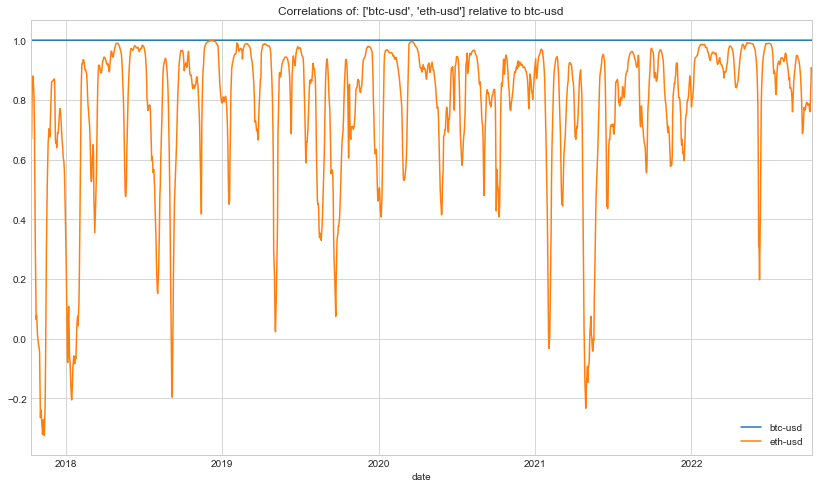

In [18]:
# BTC and ETH all time

corrMA(crypto_df)

In [92]:
# Next question is how do I go about plotting this!

# Unstack the data associated with one column and get the correlations associated with it! 
# test["btc-usd"].unstack()

# Test / if done correctly, then the "btc-usd" to self correlation should be 1
# test["btc-usd"].unstack()["btc-usd"]

In [93]:
# Plot the correlations!
# test["btc-usd"].unstack()[["btc-usd", "eth-usd"]].plot()

In [85]:
# New hypothesis / what happens when the correlation with BTC drops below some threshold?
# Can we create a correlation MA technical indicator where we know what will happen to some cryptos
# based on the "gold standard" of BTC? 